In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Load and explore the datasets
import pandas as pd

# Example path on Windows (adjust if needed)
threats_path = "C:/Users/ASWATHY/Downloads/cyber security threats dataset.xlsx"

In [21]:
# Load Excel files
threats_df = pd.read_excel(threats_path)

print("Threats dataset loaded successfully!")

Threats dataset loaded successfully!


In [24]:
# Basic exploration of datasets

# Display first few rows

print("\nFirst 5 Rows of the Dataset:")
display(threats_df.head())


First 5 Rows of the Dataset:


,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,total_payload_bytes,...,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,label
0,192.168.10.9_1841_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:13.991,192.168.10.9,1841,205.174.165.73,8080,TCP,0.135358,8,322,...,0.044844,0.061008,0.131123,0.001660,0.134532,0.0,0.0,0.0,0.0,Botnet_ARES
1,192.168.10.9_1845_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:24.131,192.168.10.9,1845,205.174.165.73,8080,TCP,0.128585,8,322,...,0.042638,0.057734,0.124286,0.001701,0.127915,0.0,0.0,0.0,0.0,Botnet_ARES
2,192.168.10.9_1846_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:34.262,192.168.10.9,1846,205.174.165.73,8080,TCP,0.166355,10,325,...,0.041467,0.070571,0.163697,0.000204,0.165869,0.0,0.0,0.0,0.0,Botnet_ARES
3,192.168.10.9_1847_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:34.527,192.168.10.9,1847,205.174.165.73,8080,TCP,0.065549,8,1986,...,0.021602,0.028732,0.062233,0.001017,0.064805,0.0,0.0,0.0,0.0,Botnet_ARES
4,192.168.10.9_1848_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:44.595,192.168.10.9,1847,205.174.165.73,8080,TCP,0.080872,8,322,...,0.026761,0.036088,0.077792,0.000637,0.080284,0.0,0.0,0.0,0.0,Botnet_ARES


In [26]:
threats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11922 entries, 0 to 11921
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flow_id                 11922 non-null  object        
 1   timestamp               11922 non-null  datetime64[ns]
 2   src_ip                  11922 non-null  object        
 3   src_port                11922 non-null  int64         
 4   dst_ip                  11922 non-null  object        
 5   dst_port                11922 non-null  int64         
 6   protocol                11922 non-null  object        
 7   duration                11922 non-null  float64       
 8   packets_count           11922 non-null  int64         
 9   total_payload_bytes     11922 non-null  int64         
 10  total_header_bytes      11922 non-null  int64         
 11  bwd_total_header_bytes  11922 non-null  int64         
 12  avg_segment_size        11922 non-null  float6

In [28]:
threats_df["label"].describe()

count           11922
unique             14
top       Botnet_ARES
freq             1498
Name: label, dtype: object

In [30]:
threats_df.shape

(11922, 31)

Data Preprocessing

In [34]:
# Check for missing values

threats_df.isnull().sum()

flow_id                   0
timestamp                 0
src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
protocol                  0
duration                  0
packets_count             0
total_payload_bytes       0
total_header_bytes        0
bwd_total_header_bytes    0
avg_segment_size          0
bytes_rate                0
packets_rate              0
packet_IAT_total          0
fwd_packets_IAT_mean      0
fwd_packets_IAT_std       0
fwd_packets_IAT_max       0
fwd_packets_IAT_min       0
fwd_packets_IAT_total     0
bwd_packets_IAT_mean      0
bwd_packets_IAT_std       0
bwd_packets_IAT_max       0
bwd_packets_IAT_min       0
bwd_packets_IAT_total     0
subflow_fwd_packets       0
subflow_bwd_packets       0
subflow_fwd_bytes         0
subflow_bwd_bytes         0
label                     0
dtype: int64

In [36]:
# Removing null values

threats_df = threats_df.dropna()

In [38]:
# Check unique labels in threats dataset
unique_threats = threats_df['label'].unique()
print("Unique threat categories:", unique_threats)

Unique threat categories: ['Botnet_ARES' 'DDoS_LOIT' 'DoS_GoldenEye' 'DoS_Hulk' 'DoS_Slowhttptest'
 'DoS_Slowloris' 'Port_Scan' 'SSH-Patator' 'thursday_Benign'
 'Tuesday_Benign' 'Web_Brute_Force' 'Web_SQL_Injection' 'Web_XSS'
 'Wednesday_Benign']


In [40]:
threats_df['label'].count()

11922

In [90]:
le = LabelEncoder()

# Convert all categorical columns to string type before encoding
for col in threats_df.columns:
    if threats_df[col].dtype == 'object':
        threats_df[col] = threats_df[col].astype(str)
        threats_df[col] = le.fit_transform(threats_df[col])



In [92]:
unique_threats_value = threats_df['label'].unique()
print(unique_threats_value)

[ 0  1  2  3  4  5  6  7 13  8  9 10 11 12]


In [94]:
# Create a dictionary mapping encoded values to original labels
label_mapping_dict = dict(zip(unique_threats_value, unique_threats))

# Print the dictionary
print("Label Encoding Mapping (Encoded Value -> Original Threat Category):")
print(label_mapping_dict)

Label Encoding Mapping (Encoded Value -> Original Threat Category):
{0: 'Botnet_ARES', 1: 'DDoS_LOIT', 2: 'DoS_GoldenEye', 3: 'DoS_Hulk', 4: 'DoS_Slowhttptest', 5: 'DoS_Slowloris', 6: 'Port_Scan', 7: 'SSH-Patator', 13: 'thursday_Benign', 8: 'Tuesday_Benign', 9: 'Web_Brute_Force', 10: 'Web_SQL_Injection', 11: 'Web_XSS', 12: 'Wednesday_Benign'}


Threats Dataset Columns:
 Index(['flow_id', 'timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port',
       'protocol', 'duration', 'packets_count', 'total_payload_bytes',
       'total_header_bytes', 'bwd_total_header_bytes', 'avg_segment_size',
       'bytes_rate', 'packets_rate', 'packet_IAT_total',
       'fwd_packets_IAT_mean', 'fwd_packets_IAT_std', 'fwd_packets_IAT_max',
       'fwd_packets_IAT_min', 'fwd_packets_IAT_total', 'bwd_packets_IAT_mean',
       'bwd_packets_IAT_std', 'bwd_packets_IAT_max', 'bwd_packets_IAT_min',
       'bwd_packets_IAT_total', 'subflow_fwd_packets', 'subflow_bwd_packets',
       'subflow_fwd_bytes', 'subflow_bwd_bytes', 'label'],
      dtype='object')


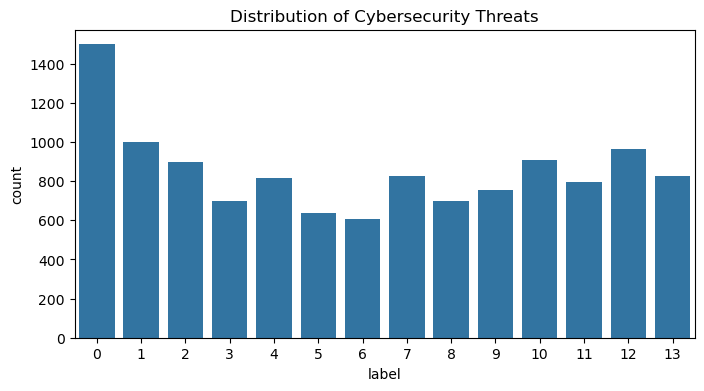

label
0     1498
1      998
12     962
10     906
2      898
7      828
13     828
4      818
11     796
9      754
3      698
8      696
5      638
6      604
Name: count, dtype: int64


In [64]:
# --- Visualizations ---

print("Threats Dataset Columns:\n", threats_df.columns)

# Distribution of Cybersecurity Threats
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=threats_df)
plt.title('Distribution of Cybersecurity Threats')
plt.show()

print(threats_df['label'].value_counts())

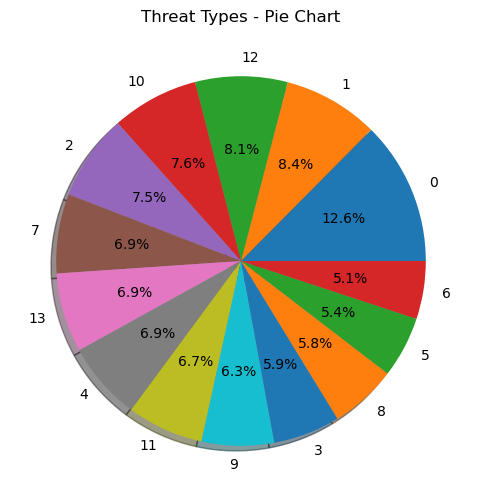

In [66]:
# Threat types - Pie Chart
import matplotlib.pyplot as plt
threats_df['label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), shadow=True)
plt.title('Threat Types - Pie Chart')
plt.ylabel('')  # Remove y-axis label
plt.show()

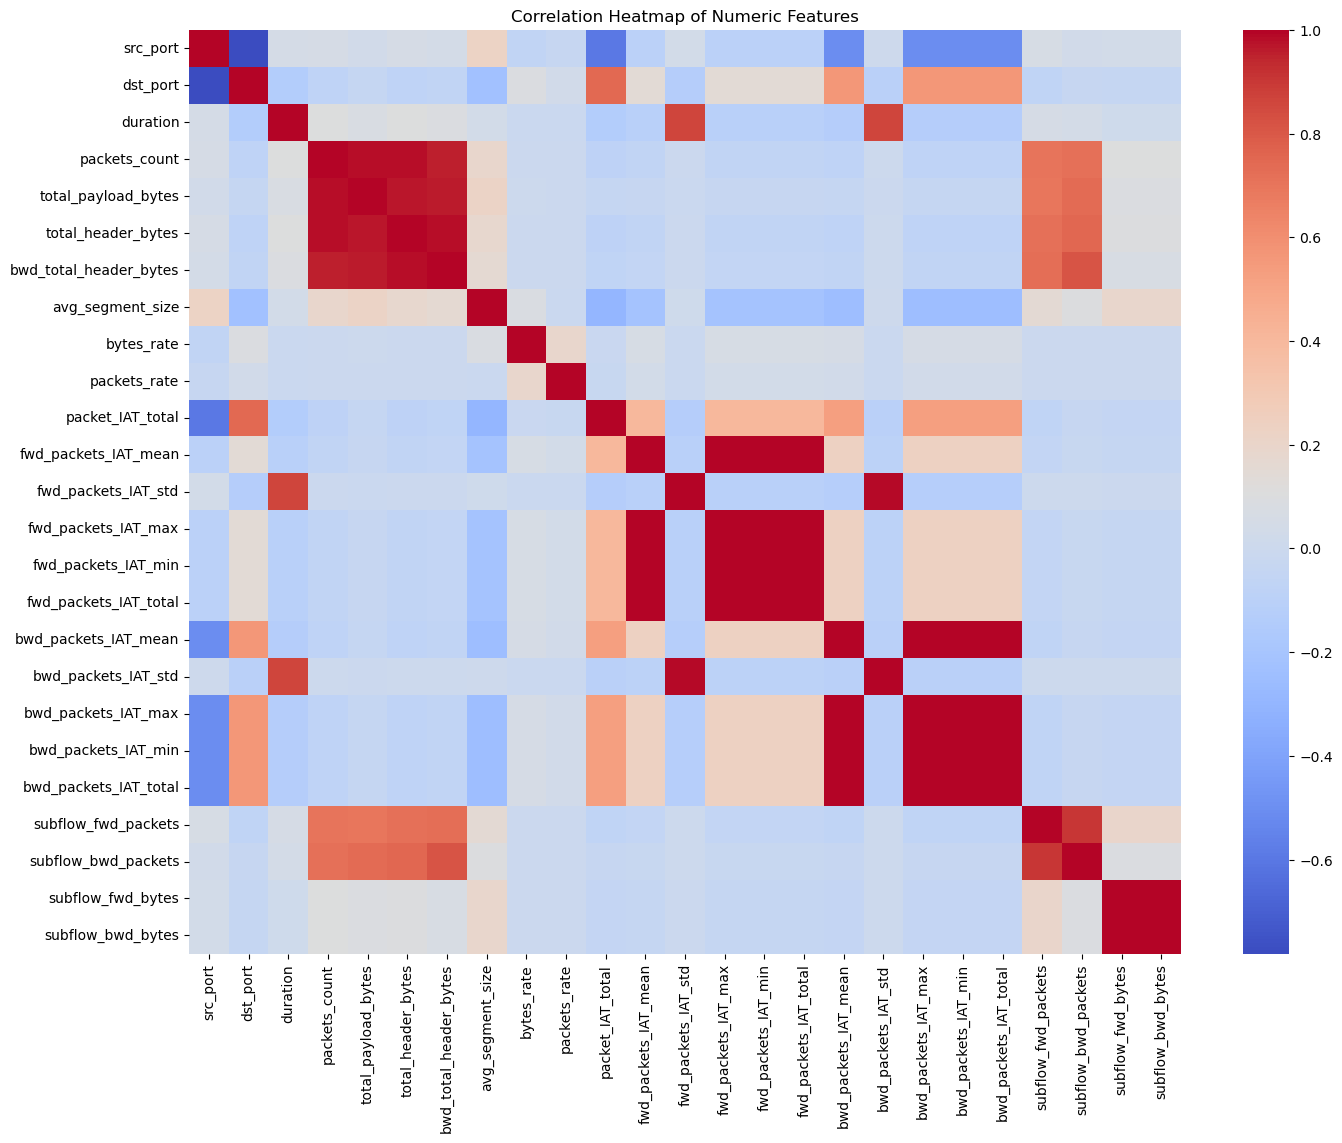

In [70]:
#Correlation Heatmap of Numeric Features
plt.figure(figsize=(16,12))
numeric_df = threats_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


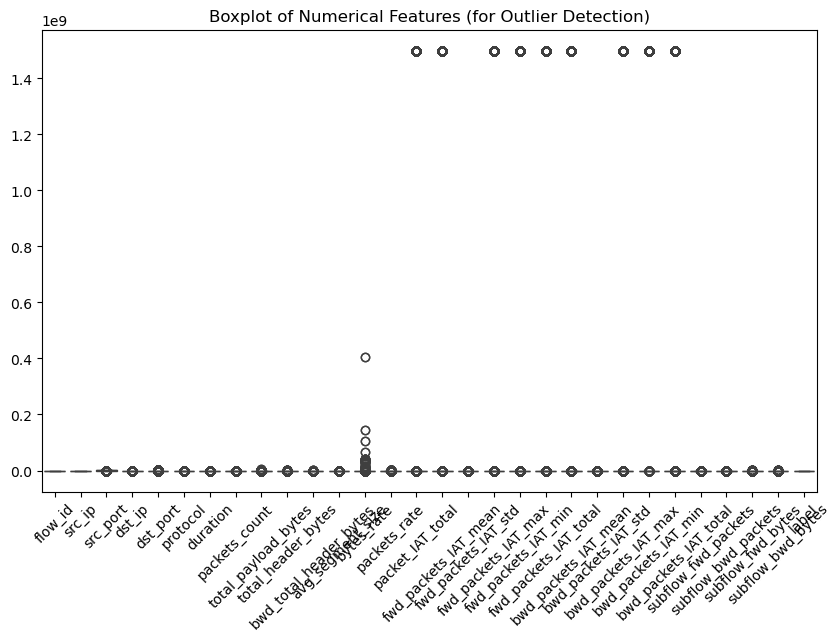

In [72]:
# Boxplot of Numerical Features (For Outlier Detection)

plt.figure(figsize=(10, 6))
sns.boxplot(data=threats_df.select_dtypes(include='number'))
plt.title('Boxplot of Numerical Features (for Outlier Detection)')
plt.xticks(rotation=45)
plt.show()

In [96]:
# Check skewness of all numerical columns
skewness = threats_df.skew(numeric_only=True)
print("Skewness of each numerical column:")
print(skewness)

Skewness of each numerical column:
flow_id                  -0.013155
src_ip                    0.634823
src_port                 -1.033221
dst_ip                    1.769818
dst_port                  1.495840
protocol                  3.654540
duration                  1.065462
packets_count             1.174483
total_payload_bytes       1.249097
total_header_bytes        1.142900
bwd_total_header_bytes    1.280528
avg_segment_size          1.183950
bytes_rate                1.331427
packets_rate              1.251236
packet_IAT_total          1.015084
fwd_packets_IAT_mean      1.254189
fwd_packets_IAT_std       1.367484
fwd_packets_IAT_max       0.968659
fwd_packets_IAT_min       1.371266
fwd_packets_IAT_total     1.186978
bwd_packets_IAT_mean      1.140913
bwd_packets_IAT_std       1.515950
bwd_packets_IAT_max       0.938082
bwd_packets_IAT_min       1.350386
bwd_packets_IAT_total     1.070231
subflow_fwd_packets       0.991406
subflow_bwd_packets       1.045836
subflow_fwd_bytes   

In [98]:
high_skew = skewness[abs(skewness) > 1]
print("\nHighly skewed columns (|skew| > 1):")
print(high_skew)


Highly skewed columns (|skew| > 1):
src_port                 -1.033221
dst_ip                    1.769818
dst_port                  1.495840
protocol                  3.654540
duration                  1.065462
packets_count             1.174483
total_payload_bytes       1.249097
total_header_bytes        1.142900
bwd_total_header_bytes    1.280528
avg_segment_size          1.183950
bytes_rate                1.331427
packets_rate              1.251236
packet_IAT_total          1.015084
fwd_packets_IAT_mean      1.254189
fwd_packets_IAT_std       1.367484
fwd_packets_IAT_min       1.371266
fwd_packets_IAT_total     1.186978
bwd_packets_IAT_mean      1.140913
bwd_packets_IAT_std       1.515950
bwd_packets_IAT_min       1.350386
bwd_packets_IAT_total     1.070231
subflow_bwd_packets       1.045836
subflow_fwd_bytes         1.228657
subflow_bwd_bytes         1.228657
dtype: float64


In [102]:
from scipy.stats import boxcox

# Select only numeric columns
numeric_cols = threats_df.select_dtypes(include=['float64', 'int64']).columns

# Check skewness
skewed = threats_df[numeric_cols].skew().sort_values(ascending=False)

# Filter highly skewed columns (|skew| > 1)
high_skew_cols = skewed[abs(skewed) > 1].index

print("Highly skewed columns:")
print(high_skew_cols)

# Fix skewness using log1p (log(x + 1)) or Box-Cox
for col in high_skew_cols:
    if (threats_df[col] > 0).all():
        # Box-Cox requires strictly positive values
        threats_df[col], _ = boxcox(threats_df[col])
    else:
        # If column has 0 or negative values, use log1p
        threats_df[col] = np.log1p(threats_df[col] - threats_df[col].min() + 1)

Highly skewed columns:
Index(['bwd_packets_IAT_std', 'dst_port', 'fwd_packets_IAT_min',
       'fwd_packets_IAT_std', 'bwd_packets_IAT_min', 'bytes_rate',
       'bwd_total_header_bytes', 'fwd_packets_IAT_mean', 'packets_rate',
       'total_payload_bytes', 'subflow_fwd_bytes', 'subflow_bwd_bytes',
       'fwd_packets_IAT_total', 'avg_segment_size', 'packets_count',
       'total_header_bytes', 'bwd_packets_IAT_mean', 'bwd_packets_IAT_total',
       'duration', 'subflow_bwd_packets', 'packet_IAT_total', 'src_port'],
      dtype='object')


In [104]:
#Recheck Skewness (After Fixing)

new_skewness = threats_df[high_skew_cols].skew()
print("\nSkewness after transformation:")
print(new_skewness)


Skewness after transformation:
bwd_packets_IAT_std       1.321011
dst_port                  0.271314
fwd_packets_IAT_min       1.370994
fwd_packets_IAT_std       0.840762
bwd_packets_IAT_min       1.042295
bytes_rate               -0.223144
bwd_total_header_bytes   -1.062973
fwd_packets_IAT_mean      0.871862
packets_rate              0.674561
total_payload_bytes      -0.273862
subflow_fwd_bytes         0.805453
subflow_bwd_bytes         0.805453
fwd_packets_IAT_total     0.348546
avg_segment_size         -0.220280
packets_count            -0.075048
total_header_bytes       -0.110584
bwd_packets_IAT_mean      0.759179
bwd_packets_IAT_total     0.439265
duration                  0.424485
subflow_bwd_packets       0.486336
packet_IAT_total          0.298899
src_port                 -0.833788
dtype: float64


In [106]:
# Detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_indices = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Get indices of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()

    return outlier_indices

outliers_dict = detect_outliers_iqr(threats_df)
print("Outliers detected in each column:")
for col, indices in outliers_dict.items():
    print(f"{col}: {len(indices)} outliers")

Outliers detected in each column:
src_port: 0 outliers
dst_port: 0 outliers
duration: 0 outliers
packets_count: 0 outliers
total_payload_bytes: 0 outliers
total_header_bytes: 0 outliers
bwd_total_header_bytes: 904 outliers
avg_segment_size: 0 outliers
bytes_rate: 0 outliers
packets_rate: 0 outliers
packet_IAT_total: 0 outliers
fwd_packets_IAT_mean: 0 outliers
fwd_packets_IAT_std: 0 outliers
fwd_packets_IAT_max: 0 outliers
fwd_packets_IAT_min: 0 outliers
fwd_packets_IAT_total: 0 outliers
bwd_packets_IAT_mean: 0 outliers
bwd_packets_IAT_std: 0 outliers
bwd_packets_IAT_max: 0 outliers
bwd_packets_IAT_min: 0 outliers
bwd_packets_IAT_total: 0 outliers
subflow_fwd_packets: 0 outliers
subflow_bwd_packets: 0 outliers
subflow_fwd_bytes: 0 outliers
subflow_bwd_bytes: 0 outliers


In [108]:
#Exploratory Data Analysis

print("Threats Dataset\n\n",threats_df.columns)

Threats Dataset

 Index(['flow_id', 'timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port',
       'protocol', 'duration', 'packets_count', 'total_payload_bytes',
       'total_header_bytes', 'bwd_total_header_bytes', 'avg_segment_size',
       'bytes_rate', 'packets_rate', 'packet_IAT_total',
       'fwd_packets_IAT_mean', 'fwd_packets_IAT_std', 'fwd_packets_IAT_max',
       'fwd_packets_IAT_min', 'fwd_packets_IAT_total', 'bwd_packets_IAT_mean',
       'bwd_packets_IAT_std', 'bwd_packets_IAT_max', 'bwd_packets_IAT_min',
       'bwd_packets_IAT_total', 'subflow_fwd_packets', 'subflow_bwd_packets',
       'subflow_fwd_bytes', 'subflow_bwd_bytes', 'label'],
      dtype='object')


In [110]:

# Feature Selection: Remove irrelevant columns
if 'label' in threats_df.columns:
    X = threats_df.drop(columns=['label',"flow_id", "timestamp","protocol", "dst_ip","src_ip"])
    y = threats_df['label']
else:
    raise ValueError("The dataset does not contain a 'label' column.")

In [112]:
zero_counts = (X == 0).sum()
print(zero_counts[zero_counts > 0])  # Show columns where 0s exist

packets_count          2158
fwd_packets_IAT_max    1380
bwd_packets_IAT_max     906
subflow_fwd_packets    5978
dtype: int64


In [114]:
# Encode the target variable before splitting
y = le.fit_transform(y)

In [116]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
#  Model Training and Evaluation
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [120]:
results = {}

In [122]:
# Model Evaluation

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
# Now proceeding with training the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", results[model_name]["Confusion Matrix"])
    print("Classification Report:\n", results[model_name]["Classification Report"])
    print("-" * 60)

Model: Random Forest
Accuracy: 0.9459
Confusion Matrix:
 [[312   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 192   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 173   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2 123   0   0   0   0   0   0   0   0   0   0]
 [  0   0  65   0 113   0   0   0   0   0   0   0   0   0]
 [  0   0  31   0   0  89   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 132   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 161   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0 123   0   0   0   0  10]
 [  0   0   0   0   0   0   0   0   0 140   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 186   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 147   0   0]
 [  0   0   6   0   0   0   1   0   0   0   0   0 190   2]
 [  0   0   0   0   0   0   0   0   6   0   2   0   2 175]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00    

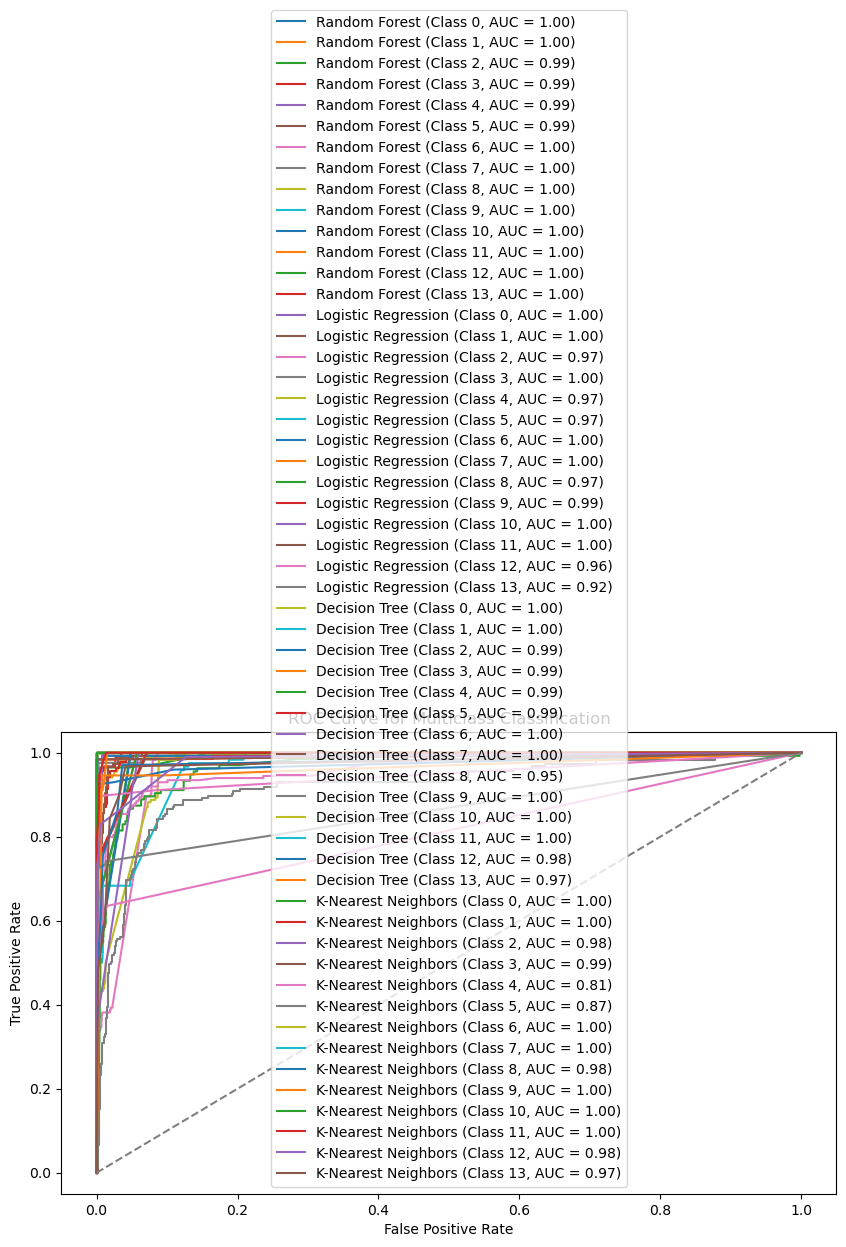

In [126]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize y_test (convert labels into a one-hot format)
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if model supports probability prediction
        y_prob = model.predict_proba(X_test)
    else:
        continue  # Skip models without probability outputs (like SVM with default settings)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (Class {i}, AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification")
plt.legend()
plt.show()


In [128]:
from sklearn.metrics import roc_auc_score

macro_auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr", average="macro")
print(f"Macro-Averaged ROC-AUC: {macro_auc:.2f}")


Macro-Averaged ROC-AUC: 0.97


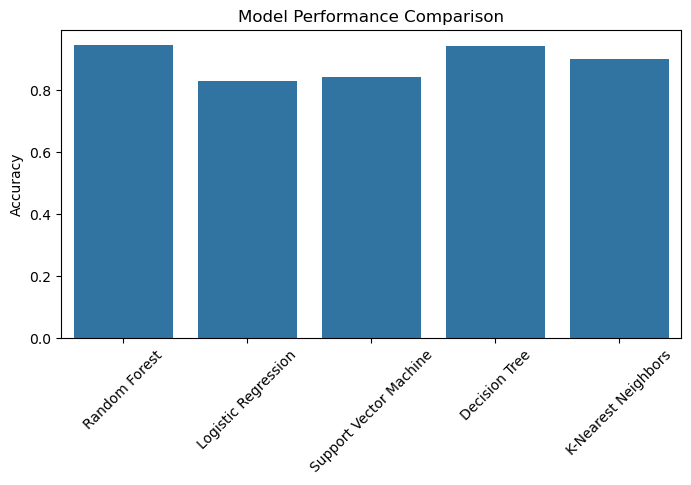

In [130]:
# Prediction
plt.figure(figsize=(8, 4))
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]
sns.barplot(x=model_names, y=accuracies)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [132]:
# After the model training and evaluation loop
# Find the model with the highest accuracy
best_model_name = max(results, key=lambda model: results[model]["Accuracy"])
best_model_accuracy = results[best_model_name]["Accuracy"]

# Print the best model and its accuracy
print(f"The best model is: {best_model_name}")
print(f"Accuracy of the best model: {best_model_accuracy:.4f}")


The best model is: Random Forest
Accuracy of the best model: 0.9459


In [134]:
best_model = models[best_model_name]
print(best_model)

RandomForestClassifier(random_state=42)


In [136]:
# Example new data (ensure it's preprocessed the same way as training data)
new_data = pd.DataFrame([[ 51700, 8080, 0.22497797, 10, 334, 224, 112, 33.4, 1484.589801, 44.44879645, 0.22497797,
    0.05605274, 0.0961889, 0.222656012, 4.79221E-05, 0.224210978, 0.05609125, 0.09583621, 0.222080946, 3.09944E-06,
    0.224364996, 0, 0, 0, 0]], columns=X.columns)

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make a prediction
prediction = best_model.predict(new_data_scaled)
prediction_label = le.inverse_transform(prediction)

print("Predicted Threat Category:", prediction_label[0])


Predicted Threat Category: 13


In [138]:
# Dictionary of Threat Descriptions
threat_descriptions = {
    0: "Botnet_ARES: A network of compromised devices controlled remotely for malicious activities.",
    1: "DDoS_LOIT: A distributed denial-of-service attack using LOIT tools to flood a target with traffic.",
    2: "DoS_GoldenEye: A DoS attack that sends continuous HTTP requests to exhaust server resources.",
    3: "DoS_Hulk: A high-speed DoS attack that rapidly generates HTTP requests to disrupt a server.",
    4: "DoS_Slowhttptest: A DoS attack exploiting slow HTTP connections to exhaust server resources.",
    5: "DoS_Slowloris: A stealthy DoS attack that holds open connections to a server, preventing new ones.",
    6: "Port_Scan: A reconnaissance technique used to detect open ports on a target system for exploitation.",
    7: "SSH-Patator: A brute-force attack attempting to gain unauthorized access to SSH services.",
    8: "thursday_Benign: Normal, non-malicious network traffic recorded on a Thursday.",
    9: "Tuesday_Benign: Normal, non-malicious network traffic recorded on a Tuesday.",
    10: "Web_Brute_Force: A brute-force attack attempting to guess login credentials on web applications.",
    11: "Web_SQL_Injection: A web attack injecting malicious SQL queries to manipulate databases.",
    12: "Web_XSS: A web attack where attackers inject malicious scripts into web applications.",
    13: "Wednesday_Benign: Normal, non-malicious network traffic recorded on a Wednesday."
}

In [140]:
# Convert predicted numeric label to actual category
predicted_category = label_mapping_dict.get(int(prediction[0]), "Unknown Category")
print("Predicted Threat Category:", predicted_category)
# Get the corresponding threat description
predicted_description = threat_descriptions.get(int(prediction[0]), "No description available.")
print(f"Description: {predicted_description}")

Predicted Threat Category: thursday_Benign
Description: Wednesday_Benign: Normal, non-malicious network traffic recorded on a Wednesday.
